<a href="https://colab.research.google.com/github/Nkashyap-anand/LeetCodeSolutions/blob/main/project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
import numpy as np

import torch
from torchvision import datasets, transforms

In [28]:
dataset = datasets.ImageFolder('/content/drive/MyDrive/dataset')

In [29]:
dataloader = torch.utils.data.DataLoader(dataset, batch_size=32, shuffle=True)

In [30]:
len(dataset)

4800

In [31]:
dataset[0]

(<PIL.Image.Image image mode=RGB size=512x512 at 0x7F44B1B414D0>, 0)

In [32]:
import matplotlib.pyplot as plt
%matplotlib inline

Label: 0


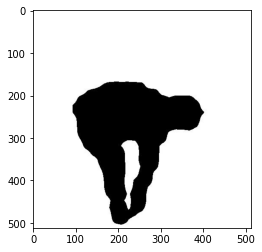

In [33]:
image, label = dataset[0]
plt.imshow(image, cmap='gray')
print('Label:', label)

Label: 0


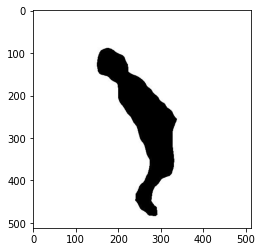

In [34]:
image, label = dataset[5]
plt.imshow(image, cmap='gray')
print('Label:', label)

In [35]:
import torchvision.transforms as transforms

In [37]:
dataset = datasets.ImageFolder('/content/drive/MyDrive/dataset', 
                transform=transforms.ToTensor())

In [38]:
img_tensor, label = dataset[0]
print(img_tensor.shape, label)

torch.Size([3, 512, 512]) 0


In [39]:
#Let's look at some sample values inside the tensor.

print(img_tensor[0,10:15,10:15])
print(torch.max(img_tensor), torch.min(img_tensor))

tensor([[1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.]])
tensor(1.) tensor(0.)


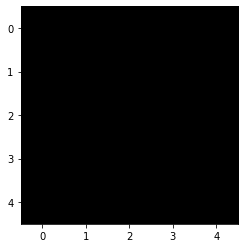

In [40]:
# Plot the image by passing in the 28x28 matrix
plt.imshow(img_tensor[0,10:15,10:15], cmap='gray');

# Training and Validation Datasets


In [43]:
from torch.utils.data import random_split

train_ds, val_ds, test_ds = random_split(dataset, [3360, 960, 480])
len(train_ds), len(val_ds), len(test_ds)

(3360, 960, 480)

In [44]:
from torch.utils.data import DataLoader

batch_size = 128

train_loader = DataLoader(train_ds, batch_size, shuffle=True)
val_loader = DataLoader(val_ds, batch_size)

# **Model**

In [46]:
import torch.nn as nn

input_size = 100*500
img_classes = 4

# Logistic regression model
model = nn.Linear(input_size, img_classes)

In [47]:
print(model.weight.shape)
model.weight

torch.Size([4, 50000])


Parameter containing:
tensor([[-4.0042e-03,  2.6314e-03,  1.6266e-03,  ..., -3.4143e-03,
         -7.6419e-04, -2.8018e-03],
        [ 1.8126e-03,  1.9563e-03, -2.5493e-03,  ..., -6.9144e-05,
          9.1265e-04, -8.4839e-04],
        [-3.8814e-04, -8.0379e-04,  3.5312e-04,  ..., -4.2598e-03,
         -1.4906e-03, -1.2350e-03],
        [ 8.4683e-04, -2.1482e-03,  7.6944e-04,  ..., -1.3035e-04,
          3.7978e-03, -3.6522e-05]], requires_grad=True)

In [48]:
print(model.bias.shape)
model.bias

torch.Size([4])


Parameter containing:
tensor([-0.0002,  0.0041,  0.0003, -0.0030], requires_grad=True)

In [52]:
for images, labels in train_loader:
    print(labels)
    print(images.shape)
    #outputs = model(images)
    #print(outputs)
    break

tensor([0, 2, 3, 2, 3, 0, 2, 2, 3, 0, 2, 2, 0, 1, 0, 2, 2, 3, 2, 2, 3, 3, 0, 1,
        3, 3, 3, 0, 1, 0, 0, 0, 1, 0, 0, 3, 3, 1, 2, 0, 1, 2, 3, 2, 0, 1, 3, 3,
        1, 0, 2, 0, 0, 0, 0, 0, 1, 2, 3, 2, 1, 3, 0, 1, 3, 1, 0, 0, 1, 1, 1, 3,
        3, 1, 3, 0, 2, 2, 3, 2, 0, 0, 3, 3, 3, 2, 2, 0, 1, 3, 0, 0, 3, 2, 3, 0,
        1, 2, 2, 2, 2, 2, 0, 1, 0, 2, 3, 1, 1, 1, 3, 0, 0, 1, 2, 3, 1, 3, 3, 1,
        2, 1, 1, 2, 2, 3, 3, 3])
torch.Size([128, 3, 512, 512])


In [53]:
class PosModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(input_size, img_classes)
        
    def forward(self, xb):
        xb = xb.reshape(-1, 50000)
        out = self.linear(xb)
        return out
    
model = PosModel()

In [54]:
model.linear

Linear(in_features=50000, out_features=4, bias=True)

In [55]:
print(model.linear.weight.shape, model.linear.bias.shape)
list(model.parameters())

torch.Size([4, 50000]) torch.Size([4])


[Parameter containing:
 tensor([[-7.1155e-04,  2.1573e-03,  3.8140e-03,  ..., -3.1685e-03,
           1.3654e-04, -2.4248e-03],
         [ 3.1389e-03,  8.9937e-04,  3.7737e-03,  ...,  2.6896e-03,
           4.4601e-03,  3.1559e-03],
         [-3.5684e-03, -3.9508e-03,  8.4570e-04,  ...,  5.5349e-05,
          -2.6436e-03, -1.5780e-03],
         [ 2.6777e-04, -4.3822e-03,  4.2222e-03,  ...,  4.1858e-03,
          -1.6905e-03, -4.4041e-03]], requires_grad=True),
 Parameter containing:
 tensor([-0.0007,  0.0011,  0.0037, -0.0021], requires_grad=True)]